Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.













In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

user_data = pd.read_csv('./user_data.csv')
logs = pd.read_csv('./logs.csv')

In [2]:
user_data.shape

(2954, 3)

In [3]:
logs.shape

(4500, 4)

In [8]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [9]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
user_data.isna()

,client,premium,age
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2949,False,False,False
2950,False,False,False
2951,False,False,False
2952,False,False,False


In [14]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [12]:
logs.isna()

,client,success,platform,time
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4495,False,False,False,False
4496,False,False,False,False
4497,False,False,False,False
4498,False,False,False,False


In [15]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [16]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [17]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


### Какой клиент совершил больше всего успешных операций? (success == True)

In [19]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [43]:
suc_numbers = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'platform': 'count'}) \
    .rename(columns={'platform': 'suc_numbers'}) \
    .sort_values('suc_numbers', ascending=False)

In [45]:
zzz = suc_numbers.suc_numbers.max()

In [49]:
suc_numbers.query('suc_numbers == @zzz').client.tolist()

[12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719]

### С какой платформы осуществляется наибольшее количество успешных операций?

In [50]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [72]:
logs.query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'client' : 'count'}) \
    .rename(columns={'client': 'platform_count'}) \
    .sort_values('platform_count', ascending=False)

,platform,platform_count
1,phone,2019
0,computer,1090
2,tablet,180


In [76]:
logs.query('success == True') \
    .platform \
    .value_counts() \
    .idxmax()

'phone'

### Какую платформу предпочитают премиумные клиенты?

In [79]:
new = user_data.merge(logs)
new

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [84]:
new.query('premium == True') \
    .platform \
    .value_counts() \
    .idxmax()

'phone'

### Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

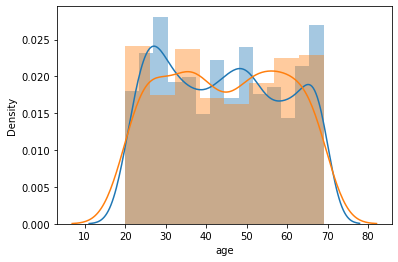

In [91]:
sns.distplot(new.query('premium == False').age)
sns.distplot(new.query('premium == True').age)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

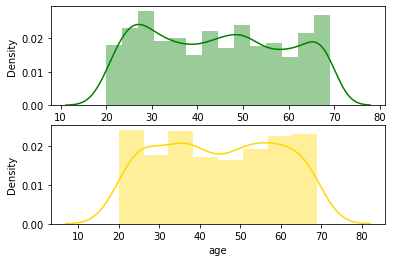

In [94]:
fig, ax = plt.subplots(nrows=2, ncols=1)
sns.distplot(new.query('premium == False').age, ax=ax[0], color='green')
sns.distplot(new.query('premium == True').age, ax=ax[1], color='gold')

### Постройте график распределения числа успешных операций

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

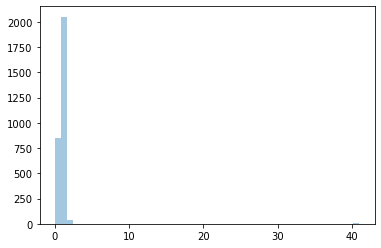

In [101]:
sns.distplot(new.groupby('client').agg({'success': 'sum'}), kde=False)

In [103]:
new.groupby('client').agg({'success': 'sum'}).value_counts()

success
1          2051
0           850
2            42
41            9
3             1
40            1
dtype: int64

### Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [104]:
new.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [124]:
age_vs_success = new.query('platform == "computer"') \
    .groupby('age', as_index=False) \
    .agg({'success' : 'sum'})


<AxesSubplot:xlabel='age', ylabel='success'>

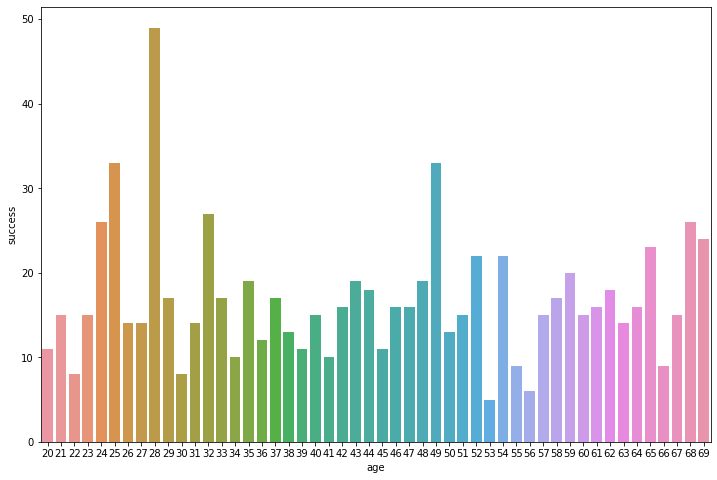

In [126]:
plt.figure(figsize=(12, 8))
sns.barplot(x=age_vs_success.age, y=age_vs_success.success)

<AxesSubplot:xlabel='age', ylabel='success'>

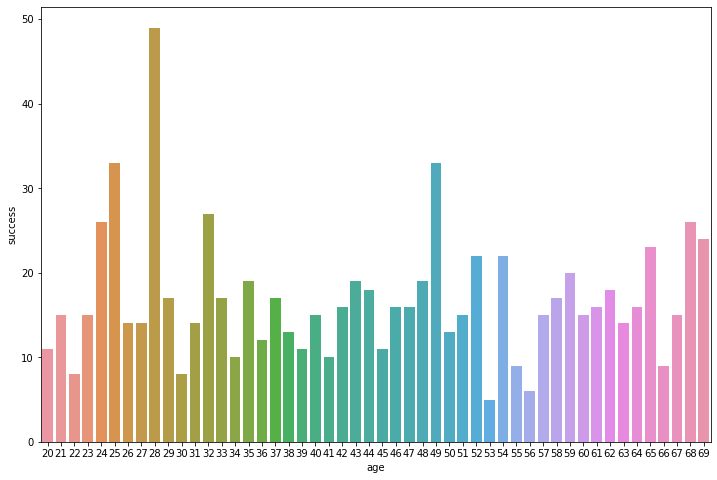

In [128]:
plt.figure(figsize=(12,8))
sns.barplot(x='age', y='success', data = age_vs_success)

In [129]:
new.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [ ]:
new.query('platform == "")